In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

torch.manual_seed(27)

In [2]:
def train(model, trainLoader, optimizer, criterion):
    model.train()
    trainLoss = 0
    correct = 0

    for i, (data, target) in enumerate(trainLoader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        trainLoss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    
    trainLoss /= len(trainLoader.dataset)
    accuracy = 100. * correct / len(trainLoader.dataset)
    return trainLoss, accuracy

In [3]:
def test(model, test_loader, criterion):
    model.eval()
    testLoss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            testLoss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    testLoss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return testLoss, accuracy

In [4]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32) 
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data', train=False, transform=transform)

trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [13]:
model1 = CNN1()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

model1_trainLosses, model1_trainAccuracies = [], []
model1_testLosses, model1_testAccuracies = [], []

for epoch in range(10):
    model1_trainLoss, model1_train_acc = train(model1, trainLoader, optimizer, criterion)
    model1_testLoss, model1_test_acc = test(model1, test_loader, criterion)
    
    model1_trainLosses.append(model1_trainLoss)
    model1_trainAccuracies.append(model1_train_acc)
    model1_testLosses.append(model1_testLoss)
    model2_testAccuracies.append(model1_test_acc)
    
    print(f'Epoch {epoch+1}:')
    print(f'Train Loss: {model1_trainLoss:.4f}, Train Accuracy: {model1_train_acc:.2f}%')
    print(f'Test Loss: {model1_testLoss:.4f}, Test Accuracy: {model1_test_acc:.2f}%')
    print()

Epoch 1:
Train Loss: 0.0037, Train Accuracy: 92.64%
Test Loss: 0.0001, Test Accuracy: 97.86%

Epoch 2:
Train Loss: 0.0010, Train Accuracy: 97.94%
Test Loss: 0.0001, Test Accuracy: 98.36%

Epoch 3:
Train Loss: 0.0007, Train Accuracy: 98.58%
Test Loss: 0.0000, Test Accuracy: 98.87%

Epoch 4:
Train Loss: 0.0006, Train Accuracy: 98.82%
Test Loss: 0.0000, Test Accuracy: 98.62%

Epoch 5:
Train Loss: 0.0005, Train Accuracy: 98.95%
Test Loss: 0.0000, Test Accuracy: 98.91%

Epoch 6:
Train Loss: 0.0004, Train Accuracy: 99.08%
Test Loss: 0.0000, Test Accuracy: 98.85%

Epoch 7:
Train Loss: 0.0004, Train Accuracy: 99.27%
Test Loss: 0.0000, Test Accuracy: 98.61%

Epoch 8:
Train Loss: 0.0003, Train Accuracy: 99.32%
Test Loss: 0.0000, Test Accuracy: 98.65%

Epoch 9:
Train Loss: 0.0003, Train Accuracy: 99.40%
Test Loss: 0.0000, Test Accuracy: 98.93%

Epoch 10:
Train Loss: 0.0002, Train Accuracy: 99.52%
Test Loss: 0.0000, Test Accuracy: 98.90%



In [14]:
model2 = CNN2()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
model2_trainLosses, model2_trainAccuracies = [], []
model2_testLosses, model2_testAccuracies = [], []

for epoch in range(num_epochs):
    model2_trainLoss, model2_trainAcc = train(model2, trainLoader, optimizer, criterion)
    model2_testLoss, model2_testAcc = test(model2, test_loader, criterion)
    
    model2_trainLosses.append(model2_trainLoss)
    model2_trainAccuracies.append(model2_trainAcc)
    model2_testLosses.append(model2_testLoss)
    model2_testAccuracies.append(model2_testAcc)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {model2_trainLoss:.4f}, Train Accuracy: {model2_trainAcc:.2f}%')
    print(f'Test Loss: {model2_testLoss:.4f}, Test Accuracy: {model2_testAcc:.2f}%')
    print()

Epoch 1/10:
Train Loss: 0.0028, Train Accuracy: 94.58%
Test Loss: 0.0001, Test Accuracy: 98.28%

Epoch 2/10:
Train Loss: 0.0008, Train Accuracy: 98.44%
Test Loss: 0.0000, Test Accuracy: 98.58%

Epoch 3/10:
Train Loss: 0.0006, Train Accuracy: 98.80%
Test Loss: 0.0000, Test Accuracy: 99.05%

Epoch 4/10:
Train Loss: 0.0005, Train Accuracy: 98.92%
Test Loss: 0.0000, Test Accuracy: 99.06%

Epoch 5/10:
Train Loss: 0.0004, Train Accuracy: 99.19%
Test Loss: 0.0000, Test Accuracy: 99.06%

Epoch 6/10:
Train Loss: 0.0004, Train Accuracy: 99.24%
Test Loss: 0.0000, Test Accuracy: 99.22%

Epoch 7/10:
Train Loss: 0.0004, Train Accuracy: 99.25%
Test Loss: 0.0000, Test Accuracy: 99.17%

Epoch 8/10:
Train Loss: 0.0003, Train Accuracy: 99.39%
Test Loss: 0.0000, Test Accuracy: 99.27%

Epoch 9/10:
Train Loss: 0.0003, Train Accuracy: 99.45%
Test Loss: 0.0000, Test Accuracy: 99.15%

Epoch 10/10:
Train Loss: 0.0003, Train Accuracy: 99.43%
Test Loss: 0.0000, Test Accuracy: 99.35%



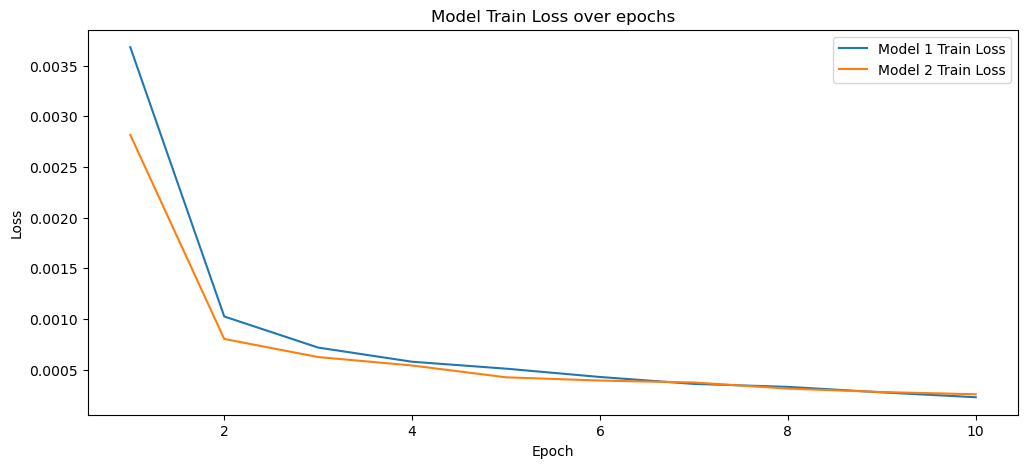

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), model1_trainLosses, label='Model 1 Train Loss')
plt.plot(range(1, num_epochs+1), model2_trainLosses, label='Model 2 Train Loss')
plt.title('Model Train Loss over epochs')
plt.legend(['Model 1', 'Model 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

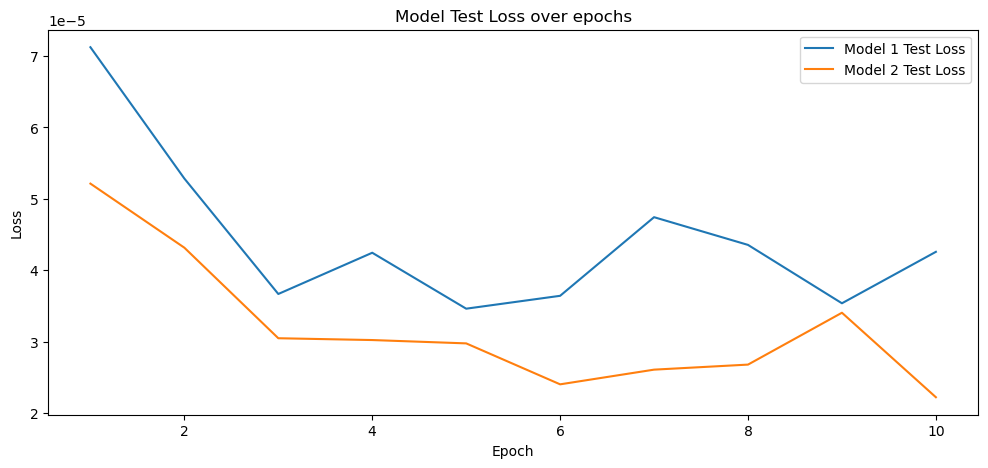

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), model1_testLosses, label='Model 1 Test Loss')
plt.plot(range(1, num_epochs+1), model2_testLosses, label='Model 2 Test Loss')
plt.title('Model Test Loss over epochs')
plt.legend(['Model 1', 'Model 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

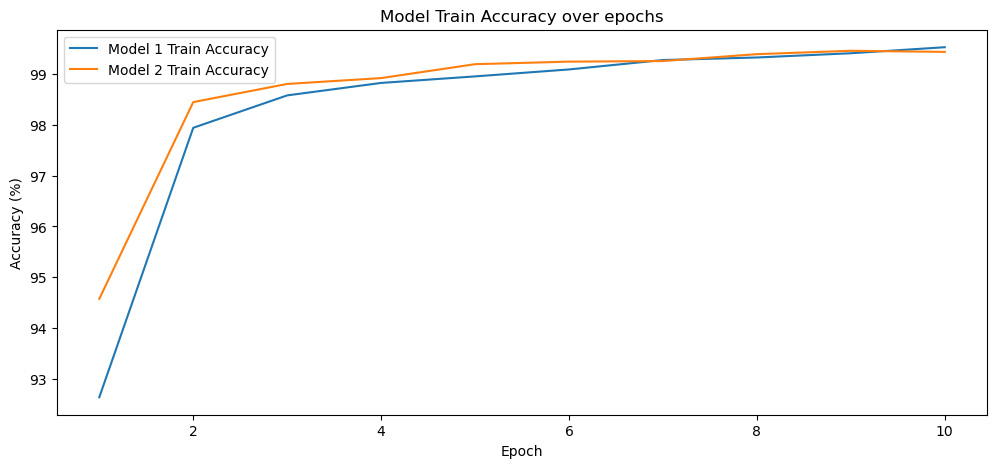

In [17]:
plt.figure(figsize=(12, 5))

plt.plot(range(1, num_epochs+1), model1_trainAccuracies, label='Model 1 Train Accuracy')
plt.plot(range(1, num_epochs+1), model2_trainAccuracies, label='Model 2 Train Accuracy')
plt.title('Model Train Accuracy over epochs')
plt.legend(['Model 1', 'Model 2'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()